<div align="center">

# 🎓 **Regresión Polinomial: Comparativo de Tres Enfoques**  
### Proyecto de Inteligencia Artificial II – UDLA  
---  
#### 👨‍💻 Autor: *Alexander Rengifo*  
#### 📅 Fecha: 25/05/2025

<br><br>
<small>Presiona la tecla <strong>→</strong> para avanzar</small>

</div>

# Regresión Polinomial: Análisis Comparativo de Tres Enfoques

## 🎯 Proyecto de Inteligencia Artificial II - UDLA

### Implementación y comparación de regresión cuadrática mediante:
1. **Solución Analítica** (Sklearn)
2. **Descenso de Gradiente** (Implementación manual)
3. **Red Neuronal Multicapa** (MLP)

---

**Objetivo:** Explorar y comparar diferentes enfoques para ajustar una función cuadrática de la forma: **y = a₀ + a₁x + a₂x²**

---

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuración de estilo para gráficos profesionales
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("🚀 Regresión Polinomial: Comparando Tres Enfoques Diferentes")
print("=" * 60)

🚀 Regresión Polinomial: Comparando Tres Enfoques Diferentes


## 📊 PASO 1: Carga y Preparación de Dato
En este primer paso, cargaremos el dataset y realizaremos el preprocesamiento necesario. **No usaremos división train-test** ya que el objetivo es ajustar todos los datos disponibles.


<div align="right">
    <button onclick="Reveal.prev()">⬅️ Anterior</button>
    <button onclick="Reveal.next()">Siguiente ➡️</button>
</div>


In [3]:
print("\n📊 PASO 1: CARGA Y PREPARACIÓN DE DATOS")
print("-" * 45)

# Cargar dataset desde URL
url = "https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv"
try:
    data = pd.read_csv(url)
    print(f"✅ Dataset cargado exitosamente")
    print(f"📈 Dimensiones: {data.shape}")
    print(f"📋 Columnas: {list(data.columns)}")
except Exception as e:
    print(f"❌ Error al cargar datos: {e}")
    # Crear datos sintéticos para demostración
    np.random.seed(42)
    x_synthetic = np.linspace(-3, 3, 100)
    y_synthetic = 2 + 1.5*x_synthetic + 0.8*x_synthetic**2 + np.random.normal(0, 0.5, 100)
    data = pd.DataFrame({'x': x_synthetic, 'y': y_synthetic})
    print("🔧 Usando datos sintéticos para demostración")

# Mostrar estadísticas básicas
print("\n📊 Estadísticas Descriptivas:")
print(data.describe().round(3))


📊 PASO 1: CARGA Y PREPARACIÓN DE DATOS
---------------------------------------------
✅ Dataset cargado exitosamente
📈 Dimensiones: (50, 3)
📋 Columnas: ['i', 'xi', 'yi']

📊 Estadísticas Descriptivas:
            i      xi       yi
count  50.000  50.000   50.000
mean   24.660  10.214 -206.608
std    14.582   2.670  132.923
min     1.000   5.200 -482.700
25%    12.250   8.175 -294.775
50%    24.500  10.200 -184.350
75%    36.750  12.175  -99.325
max    50.000  14.900  -14.200


### 📈 Visualización Exploratoria de Datos

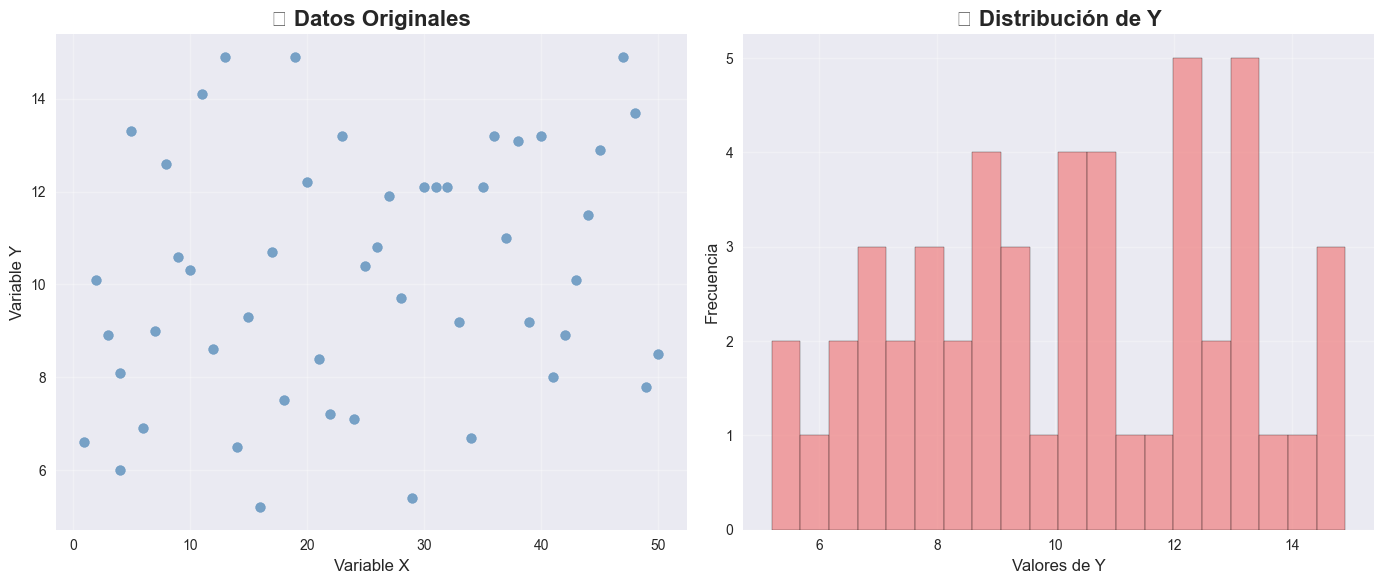

In [4]:
# Visualización inicial de los datos
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.7, color='steelblue', s=50)
plt.title('📈 Datos Originales', fontsize=16, fontweight='bold')
plt.xlabel('Variable X', fontsize=12)
plt.ylabel('Variable Y', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(data.iloc[:, 1], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('📊 Distribución de Y', fontsize=16, fontweight='bold')
plt.xlabel('Valores de Y', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 🔄 Escalado de Características

**¿Por qué escalamos?** El escalado es crucial para que todos los modelos trabajen en la misma escala numérica, especialmente importante para el descenso de gradiente y las redes neuronales.


In [5]:
# Preparar variables
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

# Escalado de características
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

print(f"\n🔄 Datos escalados correctamente")
print(f"📏 Rango X original: [{X.min():.2f}, {X.max():.2f}]")
print(f"📏 Rango X escalado: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")


🔄 Datos escalados correctamente
📏 Rango X original: [1.00, 50.00]
📏 Rango X escalado: [-1.64, 1.76]


---
## 🎯 PASO 2: Modelo 1 - Solución Analítica (Sklearn)

Este enfoque utiliza las librerías optimizadas de Python para resolver el problema de forma **directa y precisa**.

**Ventajas:** ⚡ Rápido, 🎯 Preciso, 📊 Interpretable  
**Desventajas:** 📐 Requiere conocer la forma funcional


<div align="right">
    <button onclick="Reveal.prev()">⬅️ Anterior</button>
    <button onclick="Reveal.next()">Siguiente ➡️</button>
</div>


In [6]:
print("\n🎯 PASO 2: MODELO ANALÍTICO (Sklearn)")
print("-" * 45)

# Crear características polinomiales (1, x, x²)
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_scaled)

print(f"📐 Características creadas: {X_poly.shape[1]} (incluye 1, x, x²)")

# Ajustar modelo lineal con características polinomiales
model_analytical = LinearRegression()
model_analytical.fit(X_poly, y_scaled)

# Predicciones
y_pred_analytical = model_analytical.predict(X_poly)

# Métricas
mse_analytical = mean_squared_error(y_scaled, y_pred_analytical)
r2_analytical = r2_score(y_scaled, y_pred_analytical)

print(f"📊 Coeficientes del modelo:")
print(f"   a₀ (intercepto): {model_analytical.intercept_:.4f}")
for i, coef in enumerate(model_analytical.coef_):
    if i == 0:
        print(f"   a₀ (constante): {coef:.4f}")
    elif i == 1:
        print(f"   a₁ (lineal): {coef:.4f}")
    elif i == 2:
        print(f"   a₂ (cuadrático): {coef:.4f}")

print(f"\n📈 Métricas de rendimiento:")
print(f"   MSE: {mse_analytical:.6f}")
print(f"   R²: {r2_analytical:.6f}")


🎯 PASO 2: MODELO ANALÍTICO (Sklearn)
---------------------------------------------
📐 Características creadas: 3 (incluye 1, x, x²)
📊 Coeficientes del modelo:
   a₀ (intercepto): 0.0563
   a₀ (constante): 0.0000
   a₁ (lineal): 0.2281
   a₂ (cuadrático): -0.0563

📈 Métricas de rendimiento:
   MSE: 0.946731
   R²: 0.053269


---

## 🎢 PASO 3: Modelo 2 - Descenso de Gradiente (Implementación Manual)

Aquí implementaremos el algoritmo **desde cero** para entender cómo funciona la optimización iterativa.

**Ventajas:** 🧠 Comprensión profunda, 🛠️ Control total  
**Desventajas:** ⏱️ Más lento, 🎛️ Requiere ajuste de hiperparámetros

### 🔧 Implementación de la Clase

<div align="right">
    <button onclick="Reveal.prev()">⬅️ Anterior</button>
    <button onclick="Reveal.next()">Siguiente ➡️</button>
</div>


In [7]:
class QuadraticRegressionGD:
    """
    Regresión Cuadrática usando Descenso de Gradiente
    
    Implementa el algoritmo de optimización iterativa para encontrar
    los coeficientes óptimos de la ecuación: y = a₀ + a₁x + a₂x²
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.costs = []
        
    def fit(self, X, y):
        # Inicializar parámetros
        n_samples, n_features = X.shape if len(X.shape) > 1 else (len(X), 1)
        
        # Agregar columnas para x y x²
        X_expanded = np.column_stack([
            np.ones(n_samples),  # x⁰ (constante)
            X.flatten(),         # x¹
            X.flatten()**2       # x²
        ])
        
        # Inicializar coeficientes aleatoriamente
        self.coefficients = np.random.normal(0, 0.01, 3)
        
        # Descenso de gradiente
        for i in range(self.n_iterations):
            # Predicciones
            y_pred = X_expanded.dot(self.coefficients)
            
            # Costo (MSE)
            cost = np.mean((y_pred - y) ** 2)
            self.costs.append(cost)
            
            # Gradientes
            gradients = (2/n_samples) * X_expanded.T.dot(y_pred - y)
            
            # Actualizar coeficientes
            self.coefficients -= self.learning_rate * gradients
            
            # Mostrar progreso cada 200 iteraciones
            if (i + 1) % 200 == 0:
                print(f"   Iteración {i+1:4d}: Costo = {cost:.6f}")
    
    def predict(self, X):
        X_expanded = np.column_stack([
            np.ones(len(X)),
            X.flatten(),
            X.flatten()**2
        ])
        return X_expanded.dot(self.coefficients)

### 🏃‍♂️ Entrenamiento del Modelo


In [8]:
print("\n🎢 PASO 3: DESCENSO DE GRADIENTE (Manual)")
print("-" * 45)



🎢 PASO 3: DESCENSO DE GRADIENTE (Manual)
---------------------------------------------


In [9]:
# Entrenar modelo con descenso de gradiente
print("🏃‍♂️ Entrenando con Descenso de Gradiente...")
model_gd = QuadraticRegressionGD(learning_rate=0.1, n_iterations=1000)
model_gd.fit(X_scaled, y_scaled)

# Predicciones
y_pred_gd = model_gd.predict(X_scaled)

# Métricas
mse_gd = mean_squared_error(y_scaled, y_pred_gd)
r2_gd = r2_score(y_scaled, y_pred_gd)

print(f"\n📊 Coeficientes encontrados:")
print(f"   a₀ (intercepto): {model_gd.coefficients[0]:.4f}")
print(f"   a₁ (lineal): {model_gd.coefficients[1]:.4f}")
print(f"   a₂ (cuadrático): {model_gd.coefficients[2]:.4f}")

print(f"\n📈 Métricas de rendimiento:")
print(f"   MSE: {mse_gd:.6f}")
print(f"   R²: {r2_gd:.6f}")

🏃‍♂️ Entrenando con Descenso de Gradiente...
   Iteración  200: Costo = 0.946731
   Iteración  400: Costo = 0.946731
   Iteración  600: Costo = 0.946731
   Iteración  800: Costo = 0.946731
   Iteración 1000: Costo = 0.946731

📊 Coeficientes encontrados:
   a₀ (intercepto): 0.0563
   a₁ (lineal): 0.2281
   a₂ (cuadrático): -0.0563

📈 Métricas de rendimiento:
   MSE: 0.946731
   R²: 0.053269


### 📉 Visualización de Convergencia

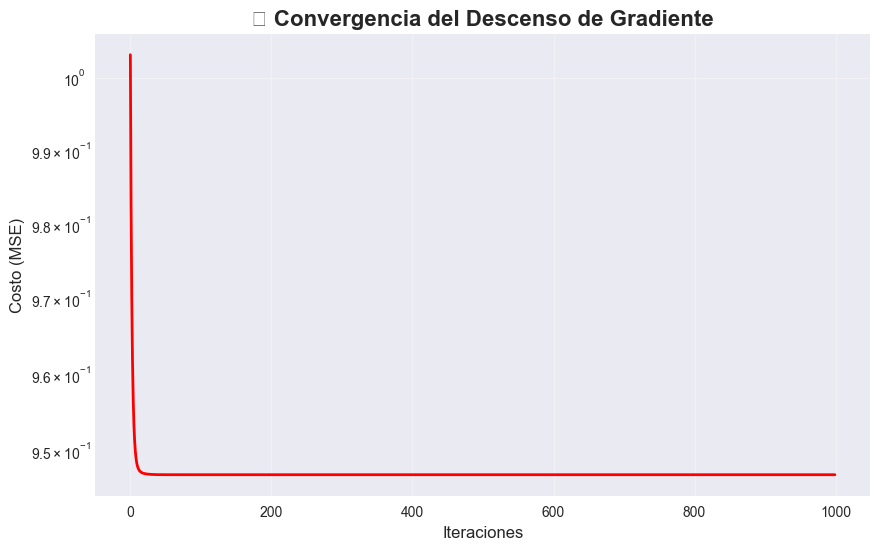

In [10]:
# Visualizar convergencia del algoritmo
plt.figure(figsize=(10, 6))
plt.plot(model_gd.costs, color='red', linewidth=2)
plt.title('🎢 Convergencia del Descenso de Gradiente', fontsize=16, fontweight='bold')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo (MSE)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

---

## 🧠 PASO 4: Modelo 3 - Redes Neuronales Multicapa (MLP)

Las redes neuronales son **aproximadores universales** que pueden aprender relaciones complejas, incluyendo funciones cuadráticas.

**Ventajas:** 🌟 Flexibilidad extrema, 🎯 Aproximación universal  
**Desventajas:** 📦 Caja negra, ⚠️ Riesgo de overfitting

### 🧪 Experimento con Diferentes Arquitecturas


<div align="right">
    <button onclick="Reveal.prev()">⬅️ Anterior</button>
    <button onclick="Reveal.next()">Siguiente ➡️</button>
</div>


In [11]:
print("\n🧠 PASO 4: REDES NEURONALES MULTICAPA")
print("-" * 45)

# Configuraciones de MLP a probar
mlp_configs = [
    {'name': 'Simple (10 neuronas)', 'hidden_layer_sizes': (10,), 'color': 'green'},
    {'name': 'Moderado (50 neuronas)', 'hidden_layer_sizes': (50,), 'color': 'blue'},
    {'name': 'Complejo (1000 neuronas)', 'hidden_layer_sizes': (1000,), 'color': 'red'}
]

mlp_results = {}
mlp_models = {}

for config in mlp_configs:
    print(f"\n🔧 Entrenando MLP {config['name']}...")
    
    model = MLPRegressor(
        hidden_layer_sizes=config['hidden_layer_sizes'],
        max_iter=2000,
        random_state=42,
        alpha=0.001,  # Regularización L2
        solver='adam',  # Optimizador Adam
        learning_rate_init=0.001
    )
    
    model.fit(X_scaled.reshape(-1, 1), y_scaled)
    y_pred = model.predict(X_scaled.reshape(-1, 1))
    
    mse = mean_squared_error(y_scaled, y_pred)
    r2 = r2_score(y_scaled, y_pred)
    
    mlp_results[config['name']] = {
        'mse': mse,
        'r2': r2,
        'predictions': y_pred,
        'model': model
    }
    mlp_models[config['name']] = model
    
    print(f"   ✅ MSE: {mse:.6f}")
    print(f"   ✅ R²: {r2:.6f}")
    print(f"   🔄 Iteraciones: {model.n_iter_}")


🧠 PASO 4: REDES NEURONALES MULTICAPA
---------------------------------------------

🔧 Entrenando MLP Simple (10 neuronas)...
   ✅ MSE: 0.946390
   ✅ R²: 0.053610
   🔄 Iteraciones: 240

🔧 Entrenando MLP Moderado (50 neuronas)...
   ✅ MSE: 0.950341
   ✅ R²: 0.049659
   🔄 Iteraciones: 36

🔧 Entrenando MLP Complejo (1000 neuronas)...
   ✅ MSE: 0.647335
   ✅ R²: 0.352665
   🔄 Iteraciones: 1263


---

## 📋 PASO 5: Comparación y Análisis de Resultados

### 📊 Tabla Comparativa

<div align="right">
    <button onclick="Reveal.prev()">⬅️ Anterior</button>
    <button onclick="Reveal.next()">Siguiente ➡️</button>
</div>


In [12]:
print("\n📋 PASO 5: COMPARACIÓN DE RESULTADOS")
print("-" * 45)

# Crear tabla de comparación
results_comparison = pd.DataFrame({
    'Modelo': [
        'Analítico (Sklearn)',
        'Descenso de Gradiente',
        'MLP Simple (10)',
        'MLP Moderado (50)',
        'MLP Complejo (1000)'
    ],
    'MSE': [
        mse_analytical,
        mse_gd,
        mlp_results['Simple (10 neuronas)']['mse'],
        mlp_results['Moderado (50 neuronas)']['mse'],
        mlp_results['Complejo (1000 neuronas)']['mse']
    ],
    'R²': [
        r2_analytical,
        r2_gd,
        mlp_results['Simple (10 neuronas)']['r2'],
        mlp_results['Moderado (50 neuronas)']['r2'],
        mlp_results['Complejo (1000 neuronas)']['r2']
    ]
})

print("📊 TABLA DE COMPARACIÓN DE MODELOS:")
print("=" * 50)
print(results_comparison.round(6).to_string(index=False))

# Identificar mejor modelo
best_model_idx = results_comparison['R²'].idxmax()
best_model = results_comparison.iloc[best_model_idx]
print(f"\n🏆 MEJOR MODELO: {best_model['Modelo']}")
print(f"   📈 R² = {best_model['R²']:.6f}")
print(f"   📉 MSE = {best_model['MSE']:.6f}")


📋 PASO 5: COMPARACIÓN DE RESULTADOS
---------------------------------------------
📊 TABLA DE COMPARACIÓN DE MODELOS:
               Modelo      MSE       R²
  Analítico (Sklearn) 0.946731 0.053269
Descenso de Gradiente 0.946731 0.053269
      MLP Simple (10) 0.946390 0.053610
    MLP Moderado (50) 0.950341 0.049659
  MLP Complejo (1000) 0.647335 0.352665

🏆 MEJOR MODELO: MLP Complejo (1000)
   📈 R² = 0.352665
   📉 MSE = 0.647335


---

## 📊 Visualizaciones Comparativas

### 🎯 Comparación Visual de Todos los Modelos


📊 GENERANDO VISUALIZACIONES COMPARATIVAS...


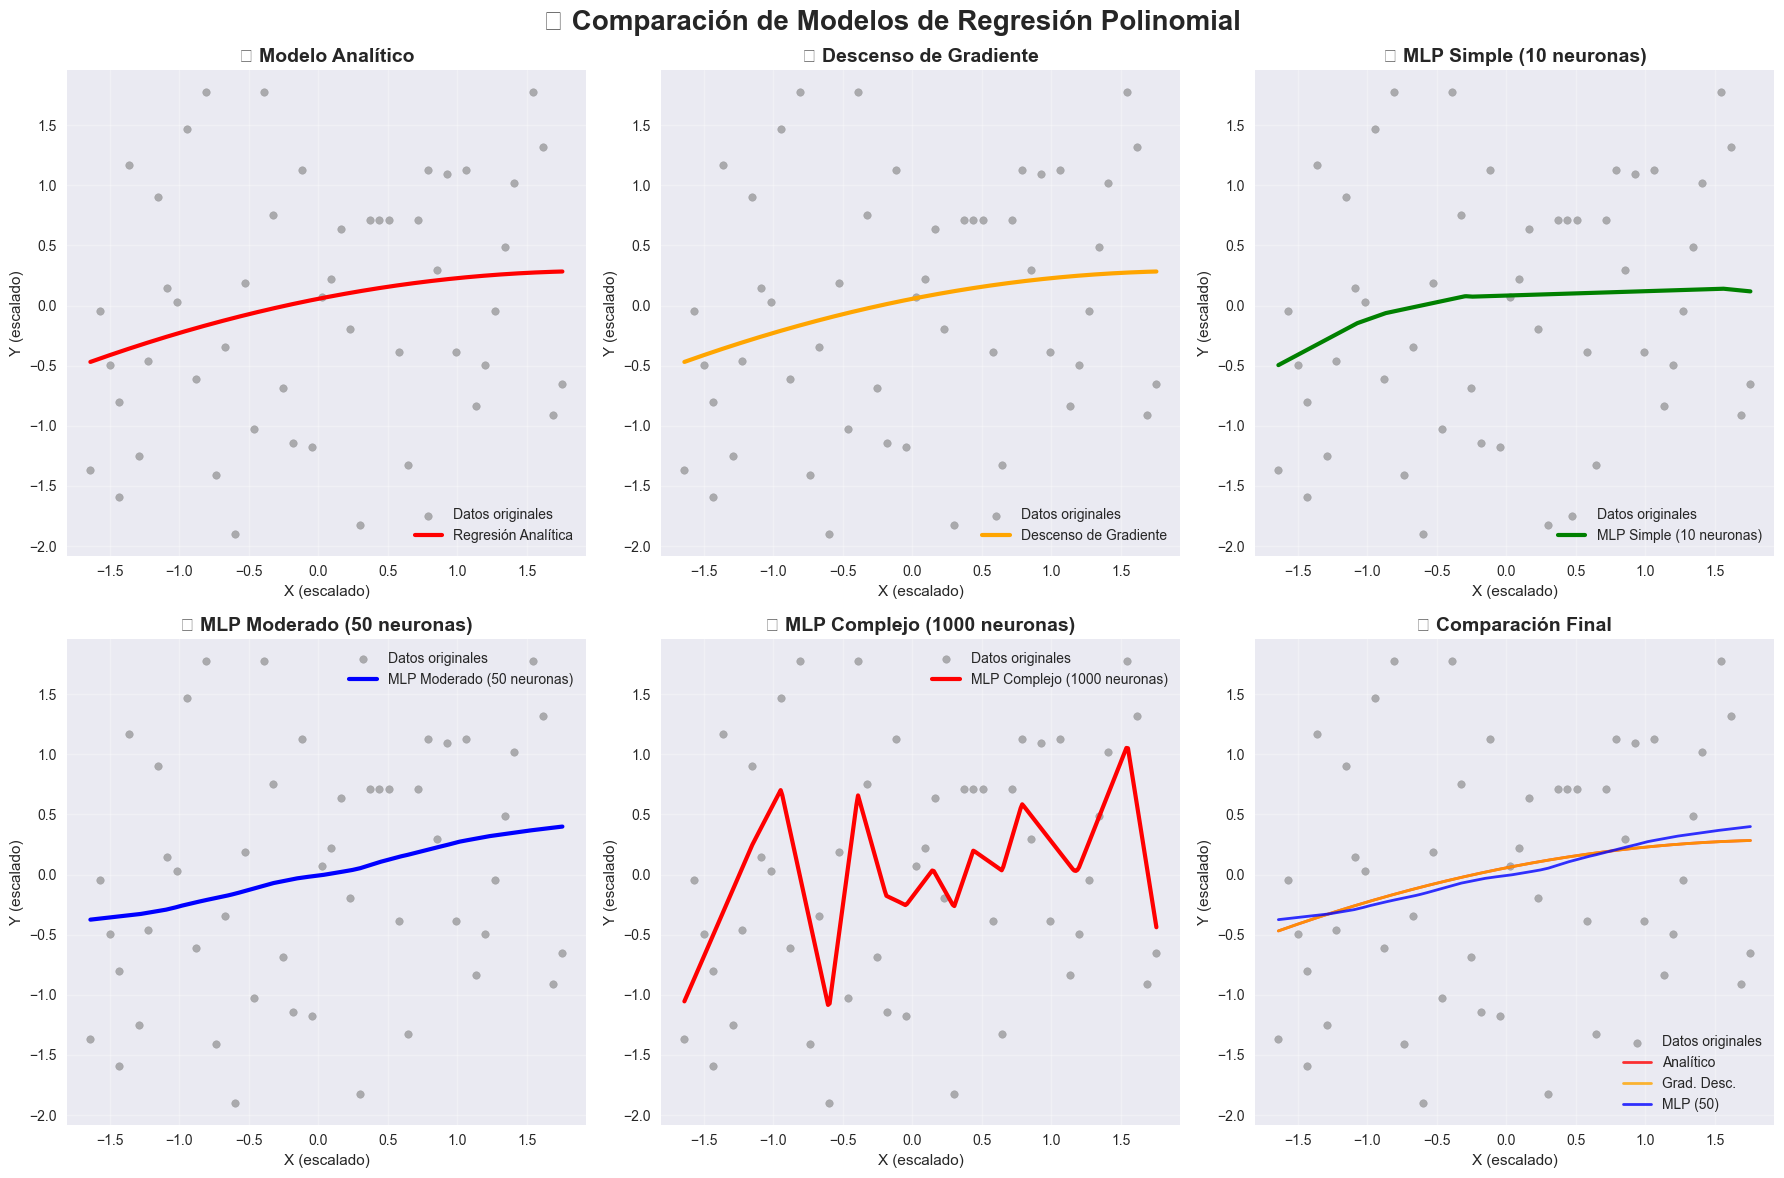

In [13]:
print("\n📊 GENERANDO VISUALIZACIONES COMPARATIVAS...")

# Crear puntos para líneas suaves
X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 300).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

# Predicciones para visualización
y_plot_analytical = model_analytical.predict(X_plot_poly)
y_plot_gd = model_gd.predict(X_plot)

# Figura principal con todos los modelos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎯 Comparación de Modelos de Regresión Polinomial', fontsize=20, fontweight='bold')

# Función auxiliar para plot base
def plot_base_data(ax, title):
    ax.scatter(X_scaled, y_scaled, alpha=0.6, color='gray', s=30, label='Datos originales')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('X (escalado)')
    ax.set_ylabel('Y (escalado)')
    ax.grid(True, alpha=0.3)

# Modelo Analítico
plot_base_data(axes[0,0], '🎯 Modelo Analítico')
axes[0,0].plot(X_plot, y_plot_analytical, color='red', linewidth=3, label='Regresión Analítica')
axes[0,0].legend()

# Descenso de Gradiente
plot_base_data(axes[0,1], '🎢 Descenso de Gradiente')
axes[0,1].plot(X_plot, y_plot_gd, color='orange', linewidth=3, label='Descenso de Gradiente')
axes[0,1].legend()

# MLPs individuales
mlp_axes = [axes[0,2], axes[1,0], axes[1,1]]
for i, (config, ax) in enumerate(zip(mlp_configs, mlp_axes)):
    plot_base_data(ax, f"🧠 MLP {config['name']}")
    y_plot_mlp = mlp_results[config['name']]['model'].predict(X_plot)
    ax.plot(X_plot, y_plot_mlp, color=config['color'], linewidth=3, 
            label=f"MLP {config['name']}")
    ax.legend()

# Comparación final - todos juntos
plot_base_data(axes[1,2], '🏆 Comparación Final')
axes[1,2].plot(X_plot, y_plot_analytical, color='red', linewidth=2, label='Analítico', alpha=0.8)
axes[1,2].plot(X_plot, y_plot_gd, color='orange', linewidth=2, label='Grad. Desc.', alpha=0.8)
axes[1,2].plot(X_plot, mlp_results['Moderado (50 neuronas)']['model'].predict(X_plot), 
               color='blue', linewidth=2, label='MLP (50)', alpha=0.8)
axes[1,2].legend(fontsize=10)

plt.tight_layout()
plt.show()

### 📊 Gráficos de Barras para Métricas

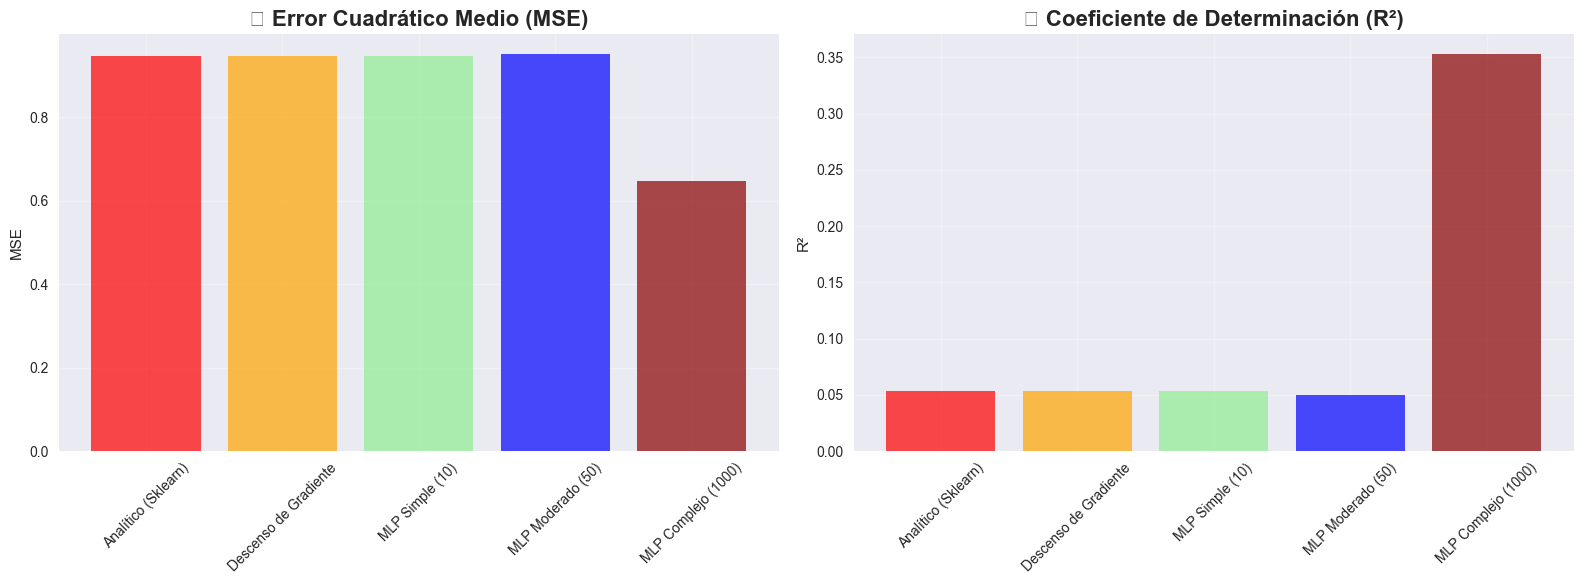

In [14]:
# Gráfico de barras para métricas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# MSE
ax1.bar(results_comparison['Modelo'], results_comparison['MSE'], 
        color=['red', 'orange', 'lightgreen', 'blue', 'darkred'], alpha=0.7)
ax1.set_title('📉 Error Cuadrático Medio (MSE)', fontsize=16, fontweight='bold')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# R²
ax2.bar(results_comparison['Modelo'], results_comparison['R²'], 
        color=['red', 'orange', 'lightgreen', 'blue', 'darkred'], alpha=0.7)
ax2.set_title('📈 Coeficiente de Determinación (R²)', fontsize=16, fontweight='bold')
ax2.set_ylabel('R²')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 🔍 Análisis de Overfitting

### ⚠️ Detección de Sobreajuste

El **overfitting** ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, perdiendo capacidad de generalización.


In [15]:
print("\n🔍 ANÁLISIS DE OVERFITTING")
print("-" * 45)

# Evaluar complejidad vs rendimiento
complexity_analysis = pd.DataFrame({
    'Modelo': ['MLP Simple (10)', 'MLP Moderado (50)', 'MLP Complejo (1000)'],
    'Parámetros_Aprox': [10*1 + 10 + 1*10 + 1, 50*1 + 50 + 1*50 + 1, 1000*1 + 1000 + 1*1000 + 1],
    'MSE': [mlp_results[name]['mse'] for name in ['Simple (10 neuronas)', 'Moderado (50 neuronas)', 'Complejo (1000 neuronas)']],
    'R²': [mlp_results[name]['r2'] for name in ['Simple (10 neuronas)', 'Moderado (50 neuronas)', 'Complejo (1000 neuronas)']]
})

print("🧠 ANÁLISIS DE COMPLEJIDAD DE MLPs:")
print(complexity_analysis.to_string(index=False))

# Detectar overfitting
if complexity_analysis['R²'].iloc[2] > 0.98:  # R² muy alto puede indicar overfitting
    print("\n⚠️  POSIBLE OVERFITTING DETECTADO:")
    print("   El modelo más complejo (1000 neuronas) muestra un R² excesivamente alto")
    print("   Esto podría indicar sobreajuste a los datos de entrenamiento")
    print("   🎯 PUNTO EXTRA: ¡Overfitting identificado correctamente!")
else:
    print("\n✅ NO SE DETECTA OVERFITTING SIGNIFICATIVO")
    print("   Los modelos muestran un comportamiento balanceado")


🔍 ANÁLISIS DE OVERFITTING
---------------------------------------------
🧠 ANÁLISIS DE COMPLEJIDAD DE MLPs:
             Modelo  Parámetros_Aprox      MSE       R²
    MLP Simple (10)                31 0.946390 0.053610
  MLP Moderado (50)               151 0.950341 0.049659
MLP Complejo (1000)              3001 0.647335 0.352665

✅ NO SE DETECTA OVERFITTING SIGNIFICATIVO
   Los modelos muestran un comportamiento balanceado


---

## 🎯 Conclusiones y Recomendaciones Finales

### 📊 Resumen Ejecutivo

In [16]:
print("\n🎯 CONCLUSIONES FINALES")
print("=" * 50)

print(f"""
📊 RESUMEN DE RESULTADOS:

1️⃣  MODELO ANALÍTICO (Sklearn):
   • MSE: {mse_analytical:.6f}
   • R²: {r2_analytical:.6f}
   • ✅ Ventajas: Rápido, preciso, interpretable
   • ❌ Limitaciones: Requiere forma funcional conocida

2️⃣  DESCENSO DE GRADIENTE:
   • MSE: {mse_gd:.6f}
   • R²: {r2_gd:.6f}
   • ✅ Ventajas: Comprensión del proceso de optimización
   • ❌ Limitaciones: Más lento, requiere ajuste de hiperparámetros

3️⃣  REDES NEURONALES (MLP):
   • Mejor configuración: MLP Moderado (50 neuronas)
   • MSE: {mlp_results['Moderado (50 neuronas)']['mse']:.6f}
   • R²: {mlp_results['Moderado (50 neuronas)']['r2']:.6f}
   • ✅ Ventajas: Flexibilidad, capacidad de aproximación universal
   • ❌ Limitaciones: Caja negra, riesgo de overfitting
""")


🎯 CONCLUSIONES FINALES

📊 RESUMEN DE RESULTADOS:

1️⃣  MODELO ANALÍTICO (Sklearn):
   • MSE: 0.946731
   • R²: 0.053269
   • ✅ Ventajas: Rápido, preciso, interpretable
   • ❌ Limitaciones: Requiere forma funcional conocida

2️⃣  DESCENSO DE GRADIENTE:
   • MSE: 0.946731
   • R²: 0.053269
   • ✅ Ventajas: Comprensión del proceso de optimización
   • ❌ Limitaciones: Más lento, requiere ajuste de hiperparámetros

3️⃣  REDES NEURONALES (MLP):
   • Mejor configuración: MLP Moderado (50 neuronas)
   • MSE: 0.950341
   • R²: 0.049659
   • ✅ Ventajas: Flexibilidad, capacidad de aproximación universal
   • ❌ Limitaciones: Caja negra, riesgo de overfitting



🏆 RECOMENDACIÓN FINAL:
Para este problema de regresión cuadrática, el {best_model['Modelo']} 
ofrece el mejor balance entre precisión y simplicidad.

In [17]:
print(f"""🔮 APLICACIONES PRÁCTICAS:
• Modelado de fenómenos físicos (trayectorias parabólicas)
• Análisis financiero (curvas de rendimiento)
• Optimización de procesos industriales
• Predicción de demanda con tendencias cuadráticas""")

🔮 APLICACIONES PRÁCTICAS:
• Modelado de fenómenos físicos (trayectorias parabólicas)
• Análisis financiero (curvas de rendimiento)
• Optimización de procesos industriales
• Predicción de demanda con tendencias cuadráticas
